# FAOSTAT North America
We extract the datasets of some crops for the US and Canada.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from time import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import dates
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print("Matplotlib version: %s"%mpl.__version__)

NumPy version: 1.25.2
Pandas version: 2.1.1
Matplotlib version: 3.8.0


## Crops

In [50]:
year_index = pd.date_range('1961','2023', freq='Y')
print('Start: {}\nEnd: {}'.format(year_index[0], year_index[len(year_index) - 1]))

Start: 1961-12-31 00:00:00
End: 2022-12-31 00:00:00


In [22]:
crops_us_canada_path = 'data/FAOSTAT_US_Canada.csv'
crops_us_canada_path_tmp_df = pd.read_csv(crops_us_canada_path, usecols=['Area', 'Year', 'Item', 'Year', 'Value'])
crops_us_canada_path_tmp_df.head(2)

,Area,Item,Year,Value
0,Canada,Maize (corn),1961,45822
1,Canada,Maize (corn),1962,47721


In [24]:
maize_us_df = crops_us_canada_path_tmp_df[(crops_us_canada_path_tmp_df['Item'] == 'Maize (corn)') \
                                                      & (crops_us_canada_path_tmp_df['Area'] == 'United States of America')]
maize_us_df.rename(columns={'Value':'Maize Yield (100g/ha)'}, inplace=True)
maize_us_df.set_index(year_index, inplace=True)
maize_us_df.drop(['Area', 'Item', 'Year'], axis=1, inplace=True)
maize_us_df

,Maize Yield (100g/ha)
1961-12-31,39184
1962-12-31,40621
1963-12-31,42596
1964-12-31,39498
1965-12-31,46492
...,...
2018-12-31,110746
2019-12-31,105104
2020-12-31,107605
2021-12-31,110895


In [25]:
maize_canada_df = crops_us_canada_path_tmp_df[(crops_us_canada_path_tmp_df['Item'] == 'Maize (corn)') \
                                                      & (crops_us_canada_path_tmp_df['Area'] == 'Canada')]
maize_canada_df.rename(columns={'Value':'Maize Yield (100g/ha)'}, inplace=True)
maize_canada_df.set_index(year_index, inplace=True)
maize_canada_df.drop(['Area', 'Item', 'Year'], axis=1, inplace=True)
maize_canada_df

,Maize Yield (100g/ha)
1961-12-31,45822
1962-12-31,47721
1963-12-31,41108
1964-12-31,50636
1965-12-31,50061
...,...
2018-12-31,97049
2019-12-31,92364
2020-12-31,96317
2021-12-31,99958


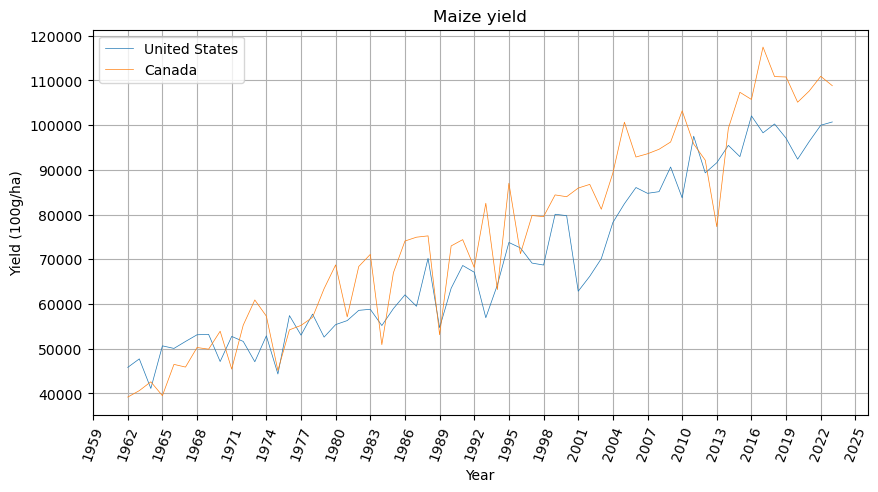

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Maize yield')
ax.set_xlabel('Year')
ax.set_ylabel('Yield (100g/ha)')
ax.set_xticks(year_index)
ax.set_xticklabels(year_index, rotation=70)
ax.xaxis.set_major_locator(dates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt_maize_us = ax.plot(maize_canada_df, linewidth=0.5, label='United States')
plt_maize_canada = ax.plot(maize_us_df, linewidth=0.5, label='Canada')
plt.legend(loc='upper left')

## Temperature anomalies

### United States
The temperatures for the US are available from the [EPA website](https://www.epa.gov/climate-indicators/climate-change-indicators-us-and-global-temperature) and from [FAOSTAT](https://www.fao.org/faostat/en/#data/ET) (Land, Inputs and Sustainability -> Climate Change Indicators)

In [72]:
temperatures_us_path = 'data/EPA_temperature_US.csv'
temperatures_us_df = pd.read_csv(precipitations_us_path, skiprows=6)
temperatures_us_df.tail(2)

,Year,Anomaly
119,2020,0.44
120,2021,0.54


Since the temperature data does not contain the value for the year 2022, we use the mean of the anomalies of the last three years. 

In [73]:
temperature_anomaly_2022 = round(temperatures_us_df['Anomaly'][-3:].mean(), 2)
temperature_anomaly_2022

1.95

In [75]:
temperature_anomaly_2022_df = {'Year': 2022, 'Anomaly': temperature_anomaly_2022}
temperature_anomaly_2022_df

{'Year': 2022, 'Anomaly': 1.95}

In [76]:
temperatures_us_df.loc[temperatures_us_df.shape[0]] = temperature_anomaly_2022_df
temperatures_us_df.tail(2)

,Year,Anomaly
120,2021,0.54
121,2022,1.95


In [77]:
temperatures_us_df.set_index(pd.date_range('1901', '2023', freq='Y'), inplace=True)
temperatures_us_df.drop('Year', axis=1, inplace=True)
temperatures_us_df.head(2)

,Anomaly
1901-12-31,-2.31
1902-12-31,0.69


In [78]:
temperatures_us_df['1961':]

,Anomaly
1961-12-31,1.31
1962-12-31,-1.34
1963-12-31,-4.24
1964-12-31,0.32
1965-12-31,-0.14
...,...
2018-12-31,4.71
2019-12-31,4.88
2020-12-31,0.44
2021-12-31,0.54


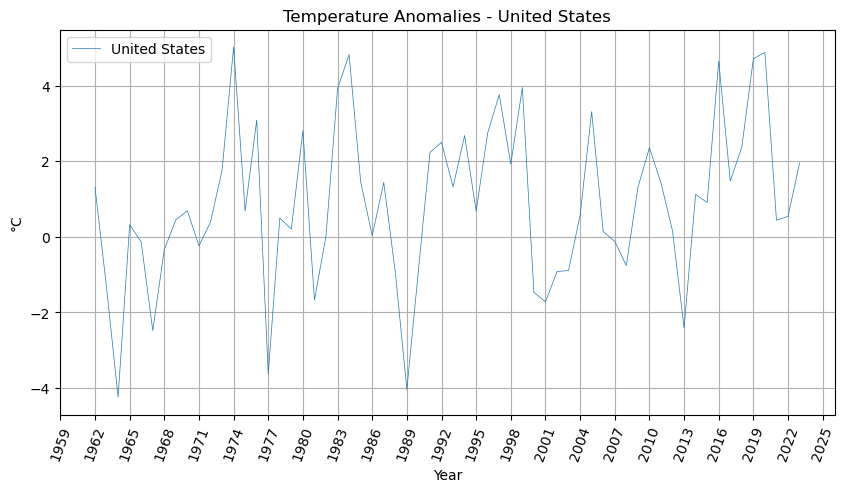

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Temperature Anomalies - United States')
ax.set_xlabel('Year')
ax.set_ylabel('°C')
ax.set_xticks(year_index)
ax.set_xticklabels(year_index, rotation=70)
ax.xaxis.set_major_locator(dates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt_temperature_us = ax.plot(temperatures_us_df['1961':], linewidth=0.5, label='United States')
plt.legend(loc='upper left')

## Precipitation anomalies

### United States
The annual precipitations for the US are available from the [EPA website](https://www.epa.gov/climate-indicators/climate-change-indicators-us-and-global-precipitation). The precipitations for Canada are not available for the full country so they should be computed using the observations from the stations located on the territory.

In [113]:
precipitations_us_path = 'data/EPA_precipitations_US.csv'
precipitations_us_df = pd.read_csv(precipitations_us_path, skiprows=6)
precipitations_us_df

,Year,Anomaly
0,1901,-2.31
1,1902,0.69
2,1903,-0.58
3,1904,-1.99
4,1905,2.66
...,...,...
116,2017,2.37
117,2018,4.71
118,2019,4.88
119,2020,0.44


Since the precipitation data does not contain the value for the year 2022, we use the mean of the anomalies of the last three years. 

In [114]:
precipitation_anomaly_2022 = round(precipitations_us_df['Anomaly'][-3:].mean(), 2)
precipitation_anomaly_2022

1.95

In [115]:
precipitation_anomaly_2022_df = {'Year': 2022, 'Anomaly': precipitation_anomaly_2022}
precipitation_anomaly_2022_df

{'Year': 2022, 'Anomaly': 1.95}

In [116]:
precipitations_us_df.loc[precipitations_us_df.shape[0]] = precipitation_anomaly_2022_df
precipitations_us_df.tail(2)

,Year,Anomaly
120,2021,0.54
121,2022,1.95


In [117]:
precipitations_us_df.set_index(pd.date_range('1901', '2023', freq='Y'), inplace=True)
precipitations_us_df.drop('Year', axis=1, inplace=True)
precipitations_us_df.head(2)

,Anomaly
1901-12-31,-2.31
1902-12-31,0.69


In [110]:
precipitations_us_df.set_index(pd.date_range('1901', '2023', freq='Y'), inplace=True)
precipitations_us_df.drop('Year', axis=1, inplace=True)
precipitations_us_df.head(2)

,Anomaly
1901-12-31,-2.31
1902-12-31,0.69


We multiply the precipitation values in inch by a constant to transform them in mm.

In [129]:
precipitations_us_df['Anomaly'] = precipitations_us_df['Anomaly'] * 25.4

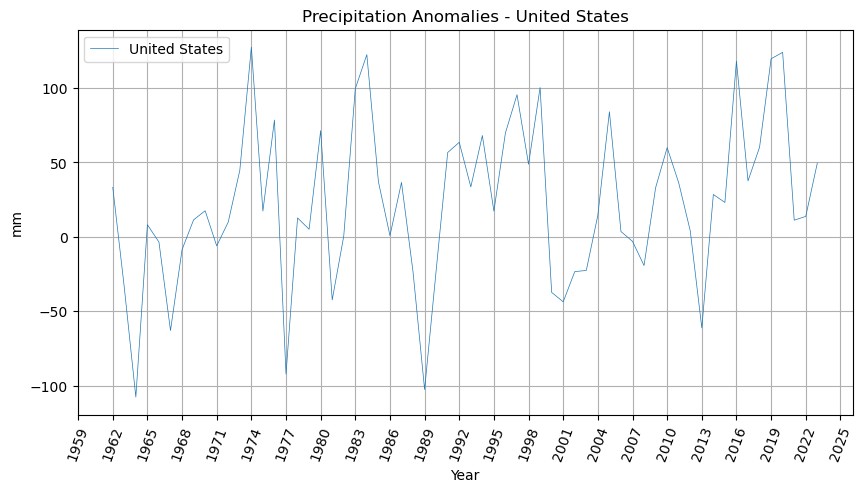

In [132]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Precipitation Anomalies - United States')
ax.set_xlabel('Year')
ax.set_ylabel('mm')
ax.set_xticks(year_index)
ax.set_xticklabels(year_index, rotation=70)
ax.xaxis.set_major_locator(dates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt_precipitation_us = ax.plot(precipitations_us_df['1961':], linewidth=0.5, label='United States')
plt.legend(loc='upper left')